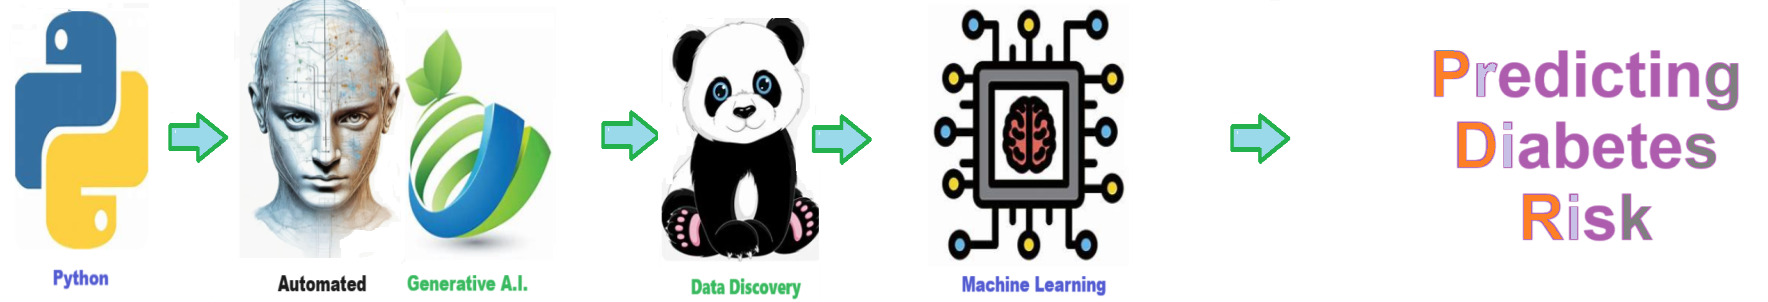

# Predicting Diabetes

## Using 10 Models to predict the onset of Diabetes in the next year.

#### Orignal notebook downloaded, adapted and localized from KAGGLE - https://www.kaggle.com/code/sandragracenelson/lung-cancer-prediction
#### by Joe Eberle started on 04-10-2022 - https://github.com/JoeEberle/ - josepheberle@outlook.com

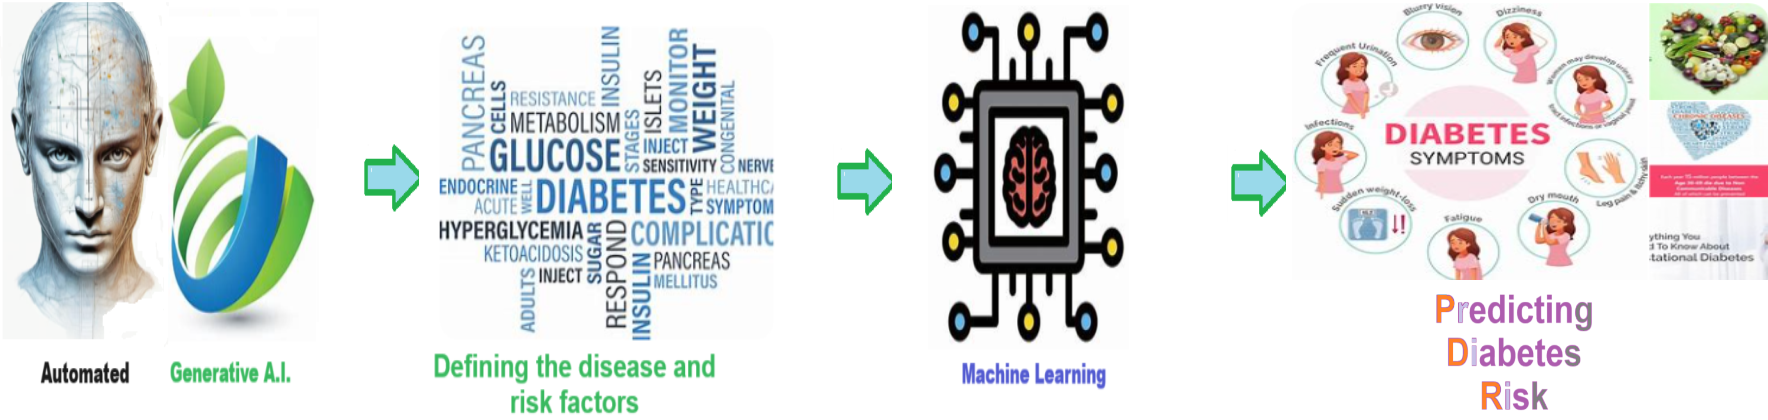

## Explanation of Each Model 

1. **Logistic Regression**: A linear model used for binary classification that estimates the probability of a sample belonging to a particular class.

2. **Decision Tree**: A tree-like model that splits the data into subsets based on the value of input features, making decisions based on feature values to classify instances.

3. **K-Nearest Neighbor (KNN)**: A non-parametric method used for classification by finding the 'k' nearest data points in the feature space and assigning the most common class among them to the query point.

4. **Gaussian Naive Bayes**: A probabilistic classifier based on Bayes' theorem with the assumption of independence among features, often used for text classification tasks.

5. **Multinomial Naive Bayes**: Similar to Gaussian Naive Bayes but specifically designed for classification tasks with discrete features, such as word counts in text classification.

6. **Support Vector Classifier (SVC)**: A supervised learning algorithm that finds the hyperplane that best separates classes in a high-dimensional space, often used for binary classification.

7. **Random Forest**: An ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees.

8. **XGBoost**: An optimized gradient boosting library that implements machine learning algorithms under the Gradient Boosting framework, known for its speed and performance in handling large datasets.

9. **Multi-layer Perceptron (MLP)**: A type of artificial neural network composed of multiple layers of nodes (neurons) that can learn non-linear relationships between input and output data.

10. **Gradient Boosting Classifier**: A machine learning technique that builds an ensemble of weak learners (typically decision trees) in a sequential manner, with each tree correcting the errors of its predecessors, resulting in a strong predictive model.

## Analyzing these variables and using machine learning algorithms 

1. Gender
2. Age
3. Smoking
4. Yellow fingers
5. Anxiety
6. Peer pressure
7. Chronic disease
8. Fatigue
9. Allergy
10. Wheezing
11. Alcohol consuming
12. Coughing
13. Shortness of breath
14. Swallowing difficulty
15. Chest pain
16. DIabetes

In [1]:
first_install = False 
if first_install:
    !pip install schedule
    !pip install zipp

In [2]:
import os
import schedule
from datetime import datetime
import pandas as pd 
import quick_logger as ql
import talking_code as tc 
import file_manager as fm 
import time

#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

print(f"Libraries Imported succesfully on {datetime.now().date()} at {datetime.now().time()}") 

Libraries Imported succesfully on 2024-04-12 at 20:11:11.170325


## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [3]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  
solution_name = 'predicting_diabetes'

## Optional Step 0 - Intitiate Logging and debugging 

In [4]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(False)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Logging Process.') 


Process predicting_diabetes Step 0 - Initializing and starting Logging Process.


## Step 1  - Read in Sample Data Set 

In [5]:
sample_file_name = 'survey lung cancer.csv'
df=pd.read_csv(sample_file_name)   # Kaggle data sets need to be localized 
print(f"The sample data file is '{sample_file_name}' ")
print(f"The sample data set contains {df.shape[0]} rows and {df.shape[1]} columns")
print(f"The sample data set contains {df.duplicated().sum()} duplicate rows, leaving {df.shape[0]-df.duplicated().sum()} unique rows" )
ql.pvlog('info',f'Process {solution_name} Step 1  - Read in Sample Data Set .') 

df

The sample data file is 'survey lung cancer.csv' 
The sample data set contains 309 rows and 16 columns
The sample data set contains 33 duplicate rows, leaving 276 unique rows
Process predicting_diabetes Step 1  - Read in Sample Data Set .


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


## Step 2.1  - Data Cleansing - Label encode
#### converts 2,1 to 1,0 int this dataset 

In [6]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


## Step 2.2  - Data Cleansing - Remove duplicates

In [7]:
df=df.drop_duplicates()     #Removing Duplicates
print(f"The sample data set contains {df.shape[0]} rows and {df.shape[1]} columns")
print(f"The sample data set contains {df.duplicated().sum()} duplicate rows, leaving {df.shape[0]-df.duplicated().sum()} unique rows" )

ql.pvlog('info',f'Process {solution_name} Step 2.2  - Data Cleansing - Remove duplicates.')

The sample data set contains 276 rows and 16 columns
The sample data set contains 0 duplicate rows, leaving 276 unique rows
Process predicting_diabetes Step 2.2  - Data Cleansing - Remove duplicates.


In [8]:
def get_column_statistics(df):
    total_rows = len(df)
    column_details = []

    for column in df.columns:
        filled_rows = df[column].count()
        filled_percentage = (filled_rows / total_rows) * 100
        dtype = df[column].dtype
        null_values = total_rows - filled_rows
        column_details.append({
            'Column': column,
            'Filled Rows': filled_rows,
            'Filled Percentage': f"{filled_percentage:.0f}%",
            'Data Type': dtype,
            'Null Values': null_values
        })
    
    df_column_stats = pd.DataFrame(column_details)
    return df_column_stats


df_column_stats = get_column_statistics(df)
df_column_stats.head(20)


,Column,Filled Rows,Filled Percentage,Data Type,Null Values
0,GENDER,276,100%,int32,0
1,AGE,276,100%,int64,0
2,SMOKING,276,100%,int64,0
3,YELLOW_FINGERS,276,100%,int64,0
4,ANXIETY,276,100%,int64,0
5,PEER_PRESSURE,276,100%,int64,0
6,CHRONIC DISEASE,276,100%,int64,0
7,FATIGUE,276,100%,int64,0
8,ALLERGY,276,100%,int64,0
9,WHEEZING,276,100%,int64,0


## Step 3  - Examine Data Set 

In [9]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int32
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [10]:
#Checking for null values
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.514493,62.909420,0.543478,0.576087,0.496377,0.507246,0.521739,0.663043,0.547101,0.547101,0.550725,0.576087,0.630435,0.467391,0.557971,0.862319
std,0.500698,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530,0.345191
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,62.500000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4 - Examine Target Variable 

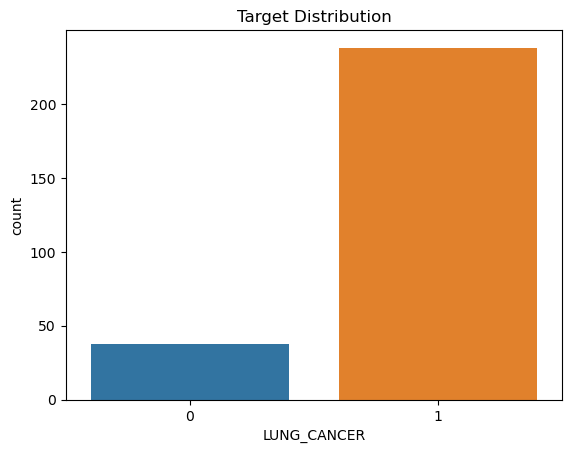

In [11]:
#Let's check the distributaion of Target variable.
target_variable = 'LUNG_CANCER'
sns.countplot(x=target_variable, data=df,)
plt.title('Target Distribution');

In [12]:
df[target_variable].value_counts()

LUNG_CANCER
1    238
0     38
Name: count, dtype: int64

In [13]:
# function for plotting
def plot_independent_to_target(col, df=df):
    return df.groupby(col)[target_variable].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(6,3))

## Step 5 - Plot all independent variables relationship to target variable

Process predicting_diabetes Step 5 - Plot all independent variables relationship to target variable


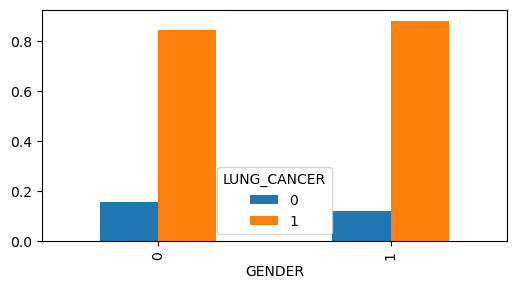

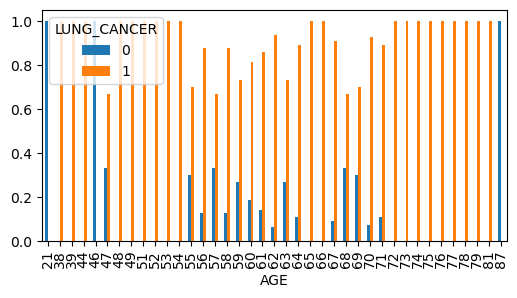

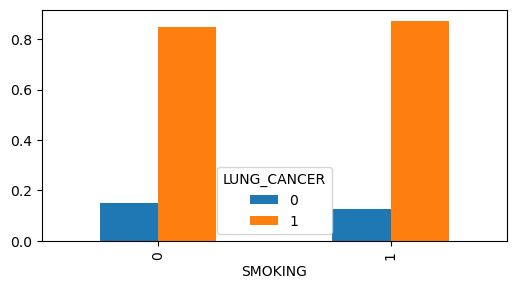

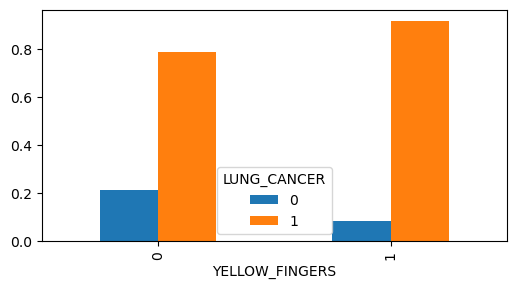

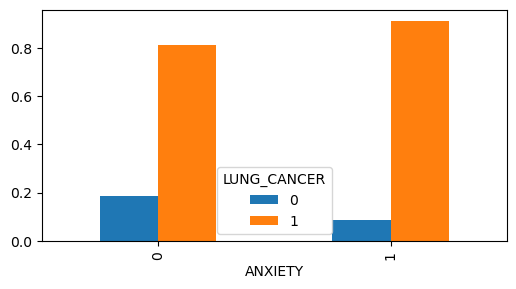

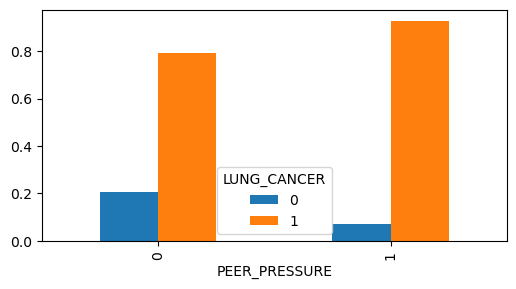

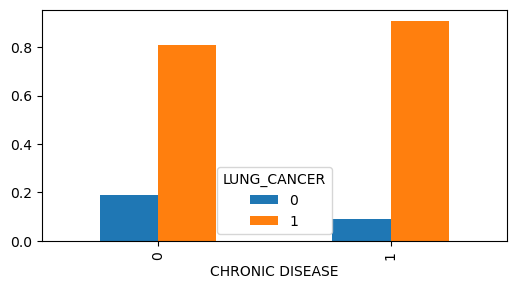

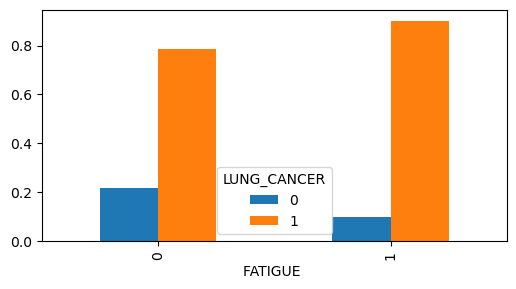

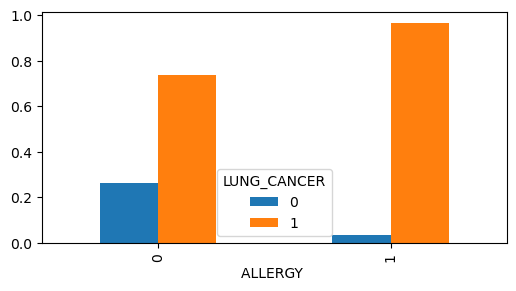

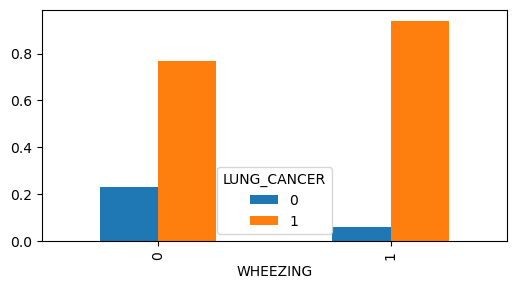

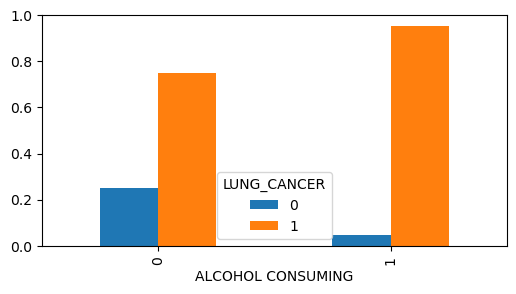

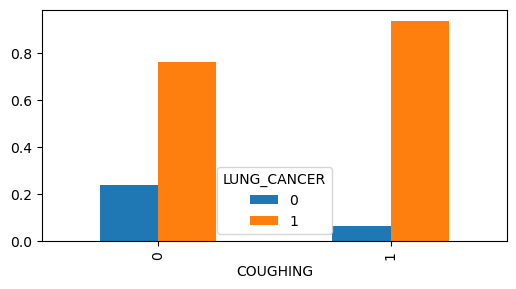

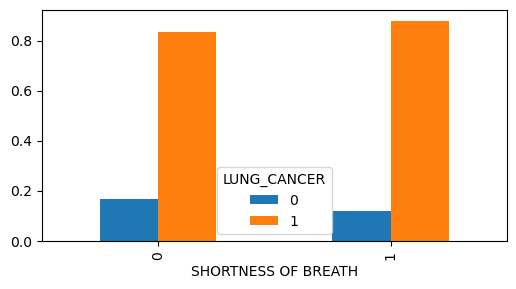

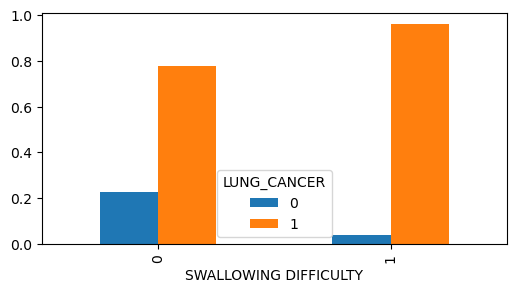

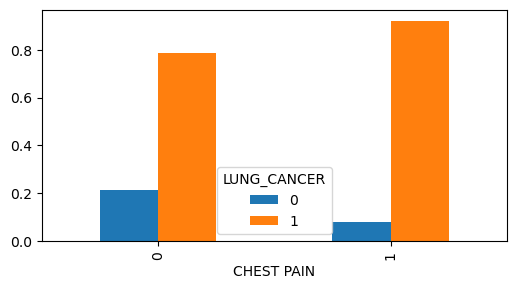

In [14]:
ql.pvlog('info',f'Process {solution_name} Step 5 - Plot all independent variables relationship to target variable')
for independent_variable in df.columns:
    if independent_variable != target_variable:
        plot_independent_to_target(independent_variable)                                           

## Step 7 - Drop the columns that dont help the analysis

In [15]:
ql.pvlog('info',f'Process {solution_name} Step 7 - Drop the columns that dont help the analysis') 
df_new=df.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH', 'PEER_PRESSURE'])
df_new

Process predicting_diabetes Step 7 - Drop the columns that dont help the analysis


,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,1,0,1,1,1,1,1,1
1,0,0,1,1,1,0,0,0,1,1,1
2,0,0,0,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,0,0,1,1,0,1,1,0,1
280,0,0,1,1,1,0,0,0,0,0,0
281,0,0,0,1,1,0,0,0,0,1,0
282,1,1,0,0,0,0,0,0,1,1,0


In [16]:
#Finding Correlation
cn=df_new.corr()
cn

,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
YELLOW_FINGERS,1.000000,0.558344,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,0.333349,-0.099169,0.189192
ANXIETY,0.558344,1.000000,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,0.478820,-0.123182,0.144322
CHRONIC DISEASE,0.015316,-0.006938,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,0.068263,-0.048895,0.143692
FATIGUE,-0.099644,-0.181474,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,-0.115727,0.013757,0.160078
ALLERGY,-0.147130,-0.159451,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.037581,0.245440,0.333552
WHEEZING,-0.058756,-0.174009,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,-0.273643,-0.152228,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.000635,0.310767,0.294422
COUGHING,0.020803,-0.218843,-0.160813,0.148538,0.206367,0.353657,0.198023,1.000000,-0.136885,0.077988,0.253027
SWALLOWING DIFFICULTY,0.333349,0.478820,0.068263,-0.115727,-0.037581,0.108304,-0.000635,-0.136885,1.000000,0.102674,0.268940
CHEST PAIN,-0.099169,-0.123182,-0.048895,0.013757,0.245440,0.142846,0.310767,0.077988,0.102674,1.000000,0.194856


## Correlation Heatmap 

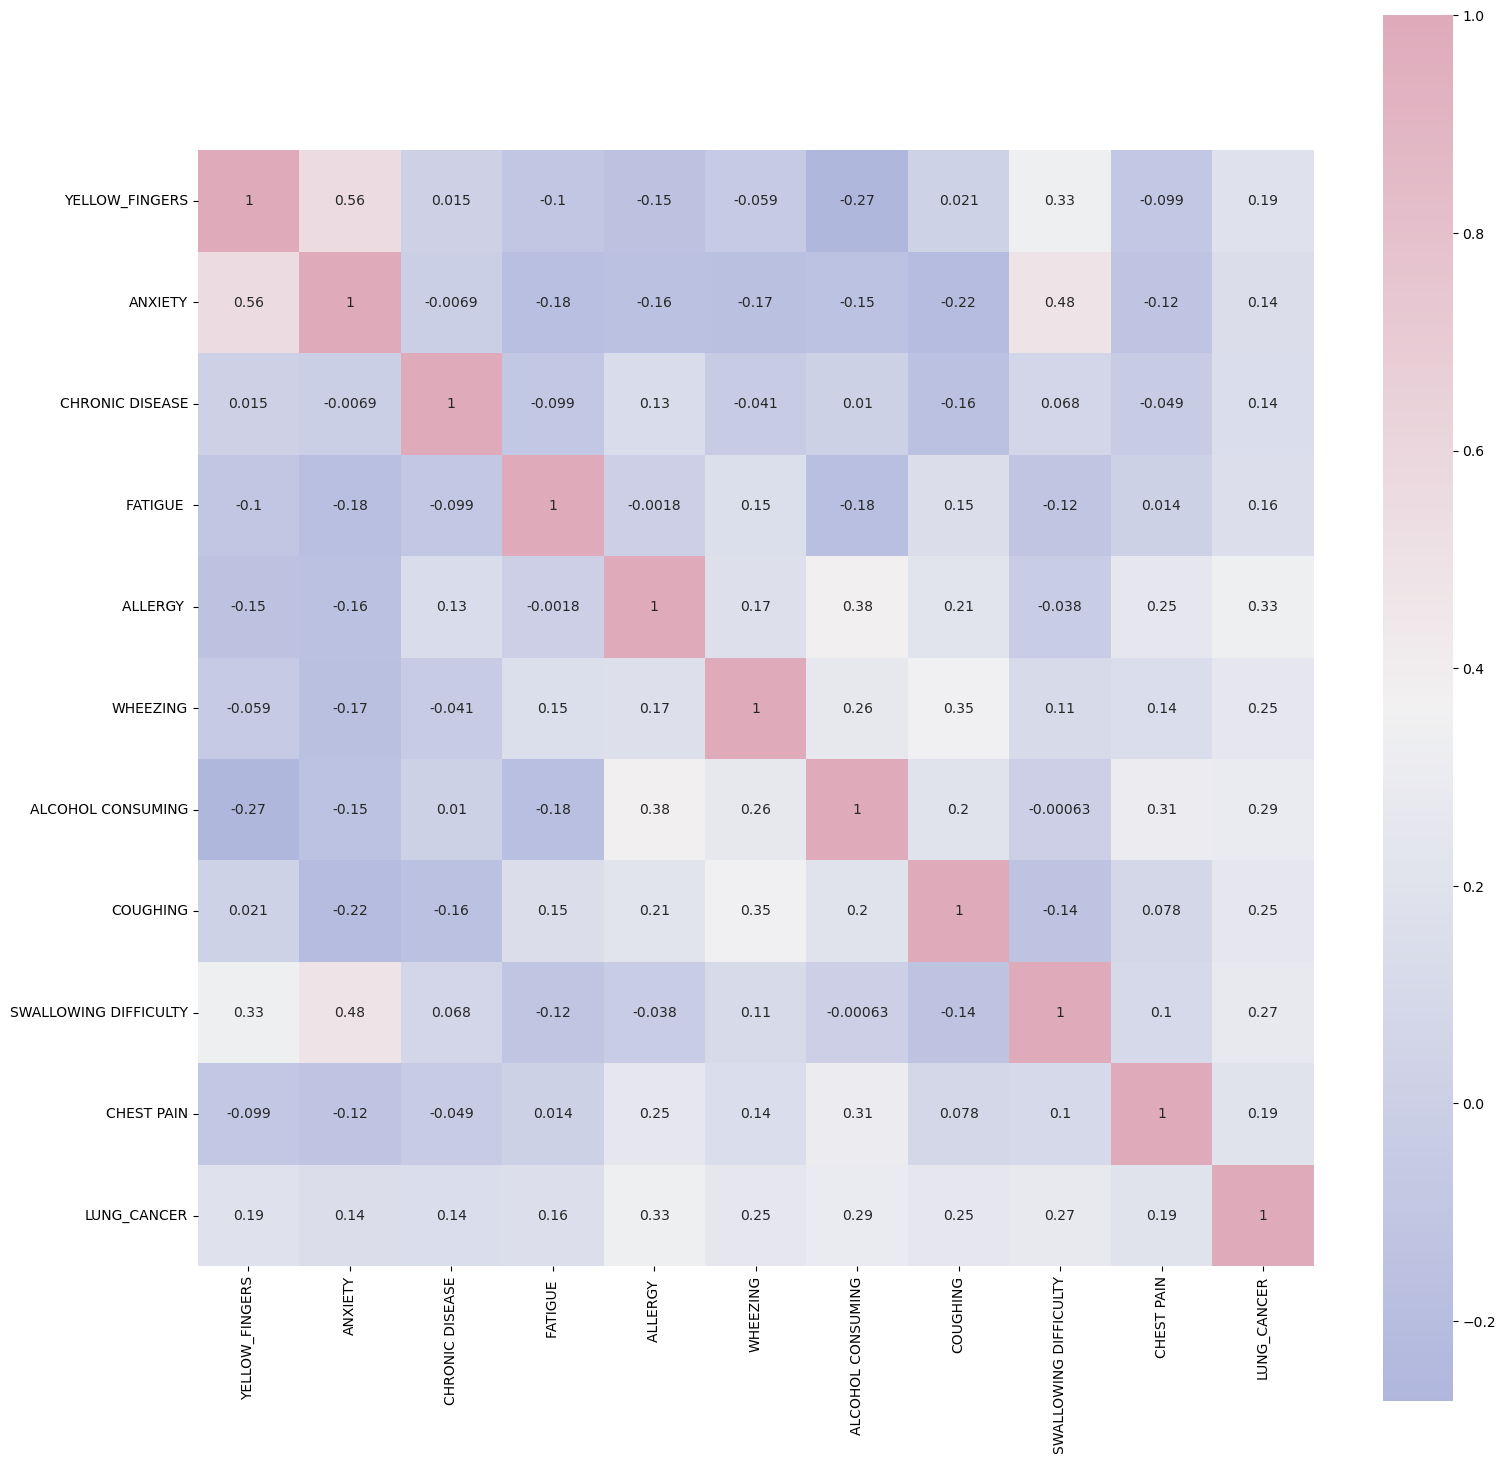

Process predicting_diabetes Step 5 - Plot all independent variables relationship to target variable


In [17]:
#Correlation 
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()
ql.pvlog('info',f'Process {solution_name} Step 5 - Plot all independent variables relationship to target variable')

## Step 8 - Feature Engineering

In [18]:
ql.pvlog('info',f'Process {solution_name} Step 8 - Feature Engineering')
df_new['ANXYELFIN']=df_new['ANXIETY']*df_new['YELLOW_FINGERS']
df_new

Process predicting_diabetes Step 8 - Feature Engineering


,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN
0,1,1,0,1,0,1,1,1,1,1,1,1
1,0,0,1,1,1,0,0,0,1,1,1,0
2,0,0,0,1,0,1,0,1,0,1,0,0
3,1,1,0,0,0,0,1,0,1,1,0,1
4,1,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,0,0,1,1,0,1,1,0,1,1
280,0,0,1,1,1,0,0,0,0,0,0,0
281,0,0,0,1,1,0,0,0,0,1,0,0
282,1,1,0,0,0,0,0,0,1,1,0,1


In [19]:
#Splitting independent and dependent variables
X = df_new.drop('LUNG_CANCER', axis = 1)
y = df_new['LUNG_CANCER']

In [20]:
!pip install imbalanced-learn

In [21]:
# from imblearn.over_sampling import ADASYN


In [22]:
# adasyn = ADASYN(random_state=42)
# X, y = adasyn.fit_resample(X, y)

In [23]:
len(X)

276

## 10 machine learning classification models using Scikit-learn library in Python

1. Logistic Regression
2. Decision Tree
3. K-Nearest Neighbor
4. Gaussian Naive Bayes
5. Multinomial Naive Bayes
6. Support Vector Classifier
7. Random Forest
8. XGBoost
9. Multi-layer Perceptron
10. Gradient Boosting Classifier

# **Logistic Regression**

**Logistic Regression**: A linear model used for binary classification that estimates the probability of a sample belonging to a particular class.

In [24]:
ql.pvlog('info',f'Process {solution_name} Machine Learning Model  - Logistic Regression')
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

Process predicting_diabetes Machine Learning Model  - Logistic Regression


In [25]:
#Fitting training data to the model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [26]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [27]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.95      0.93      0.94        60

    accuracy                           0.90        69
   macro avg       0.77      0.80      0.79        69
weighted avg       0.90      0.90      0.90        69



# **Decision Tree**

 **Decision Tree**: A tree-like model that splits the data into subsets based on the value of input features, making decisions based on feature values to classify instances.

In [28]:
#Fitting training data to the model
ql.pvlog('info',f'Process {solution_name} Machine Learning Model  - Decision Tree')
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dt_model.fit(X_train, y_train)

Process predicting_diabetes Machine Learning Model  - Decision Tree


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [29]:
#Predicting result using testing data
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [30]:
#Model accuracy
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.96      0.92      0.94        60

    accuracy                           0.90        69
   macro avg       0.77      0.85      0.80        69
weighted avg       0.92      0.90      0.90        69



# **K Nearest Neighbor**

K-Nearest Neighbor (KNN): A non-parametric method used for classification by finding the 'k' nearest data points in the feature space and assigning the most common class among them to the query point.

In [31]:
#Fitting K-NN classifier to the training set  
ql.pvlog('info',f'Process {solution_name} Machine Learning Model  - K Nearest Neighbor')
from sklearn.neighbors import KNeighborsClassifier  
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn_model.fit(X_train, y_train)

Process predicting_diabetes Machine Learning Model  - K Nearest Neighbor


KNeighborsClassifier()

In [32]:
#Predicting result using testing data
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [33]:
#Model accuracy
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.97      0.93      0.95        60

    accuracy                           0.91        69
   macro avg       0.80      0.86      0.82        69
weighted avg       0.92      0.91      0.92        69



# **Gaussian Naive Bayes**

In [34]:
#Fitting Gaussian Naive Bayes classifier to the training set  
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [35]:
#Predicting result using testing data
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [36]:
#Model accuracy
gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)
ql.pvlog('info',f'Process {solution_name} Machine Learning Model  - Gaussian Naive Bayes')

              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.95      0.92      0.93        60

    accuracy                           0.88        69
   macro avg       0.75      0.79      0.77        69
weighted avg       0.90      0.88      0.89        69

Process predicting_diabetes Machine Learning Model  - Gaussian Naive Bayes


# **Multinomial Naive Bayes**
**Multinomial Naive Bayes**: Similar to Gaussian Naive Bayes but specifically designed for classification tasks with discrete features, such as word counts in text classification.

In [37]:
#Fitting Multinomial Naive Bayes classifier to the training set  
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [38]:
#Predicting result using testing data
y_mnb_pred= mnb_model.predict(X_test)
y_mnb_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [39]:
#Model accuracy
mnb_cr=classification_report(y_test, y_mnb_pred)
print(mnb_cr)
ql.pvlog('info',f'Process {solution_name} Machine Learning Model  - Multinomial Naive Bayes')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.87      1.00      0.93        60

    accuracy                           0.87        69
   macro avg       0.43      0.50      0.47        69
weighted avg       0.76      0.87      0.81        69

Process predicting_diabetes Machine Learning Model  - Multinomial Naive Bayes


# **Support Vector Classifier**
**Support Vector Classifier (SVC)**: A supervised learning algorithm that finds the hyperplane that best separates classes in a high-dimensional space, often used for binary classification.


In [40]:
#Fitting SVC to the training set  
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [41]:
#Predicting result using testing data
y_svc_pred= svc_model.predict(X_test)
y_svc_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [42]:
#Model accuracy
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)
ql.pvlog('info',f'Process {solution_name} Machine Learning Model  - Support Vector Classifier')

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.95      0.93      0.94        60

    accuracy                           0.90        69
   macro avg       0.77      0.80      0.79        69
weighted avg       0.90      0.90      0.90        69

Process predicting_diabetes Machine Learning Model  - Support Vector Classifier


# **Random Forest**

In [43]:
#Training
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
#Predicting result using testing data
y_rf_pred= rf_model.predict(X_test)
y_rf_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [45]:
#Model accuracy
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)
ql.pvlog('info',f'Process {solution_name} Machine Learning Model  - Random Forest')

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.95      0.93      0.94        60

    accuracy                           0.90        69
   macro avg       0.77      0.80      0.79        69
weighted avg       0.90      0.90      0.90        69

Process predicting_diabetes Machine Learning Model  - Random Forest


# **XGBoost**

In [46]:
upgrading_xgboost = False
if upgrading_xgboost: 
    !pip install xgboost
    !pip install --upgrade xgboost
    !pip install --upgrade pandas

In [47]:
# from xgboost import XGBClassifier
# xgb_model = XGBClassifier()
# xgb_model.fit(X_train, y_train)

In [48]:
# #Predicting result using testing data
# y_xgb_pred= xgb_model.predict(X_test)
# y_xgb_pred

In [49]:
# #Model accuracy
# xgb_cr=classification_report(y_test, y_xgb_pred)
# print(xgb_cr)
# ql.pvlog('info',f'Process {solution_name} Machine Learning Model  - XGBoost')

# **Multi-layer Perceptron classifier**

In [50]:
#Training a neural network model
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

MLPClassifier()

In [51]:
#Predicting result using testing data
y_mlp_pred= mlp_model.predict(X_test)
y_mlp_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [52]:
#Model accuracy
mlp_cr=classification_report(y_test, y_mlp_pred)
print(mlp_cr)
ql.pvlog('info',f'Process {solution_name} Machine Learning Model  - Multi-layer Perceptron classifier')

              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.93      0.93      0.93        60

    accuracy                           0.88        69
   macro avg       0.74      0.74      0.74        69
weighted avg       0.88      0.88      0.88        69

Process predicting_diabetes Machine Learning Model  - Multi-layer Perceptron classifier


# **Gradient Boosting**

In [53]:
#Training
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [54]:
#Predicting result using testing data
y_gb_pred= gb_model.predict(X_test)
y_gb_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [55]:
#Model accuracy
gb_cr=classification_report(y_test, y_gb_pred)
print(gb_cr)
ql.pvlog('info',f'Process {solution_name} Machine Learning Model  - Gradient Boosting')

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.95      0.93      0.94        60

    accuracy                           0.90        69
   macro avg       0.77      0.80      0.79        69
weighted avg       0.90      0.90      0.90        69

Process predicting_diabetes Machine Learning Model  - Gradient Boosting


## Cross Validation 

K-Fold cross validation is a popular technique used in machine learning for model evaluation and selection. It involves dividing a dataset into K subsets of equal size, called folds. The algorithm then trains and evaluates the model K times, each time using a different fold as the validation set and the remaining K-1 folds as the training set.

During each iteration of K-Fold cross validation, the model is trained on K-1 folds and evaluated on the remaining fold. The performance metrics are then averaged over all K iterations to obtain an estimate of the model's overall performance.

K-Fold cross validation is a robust method for model evaluation because it uses all the available data for training and testing. It also helps to reduce the risk of overfitting and provides a more accurate estimate of the model's performance than using a single training-test split.

Typically, values of K between 5 and 10 are used for K-Fold cross validation, but the optimal value of K may vary depending on the size and complexity of the dataset, as well as the type of model being evaluated.

Here are some general guidelines that can help you choose an appropriate value of K:

1. For small datasets, it is recommended to use a larger value of K, such as 10. This is because the larger value of K allows for more robust estimates of model performance, given the limited amount of data.

2. For larger datasets, a smaller value of K can be used, such as 5. This is because a larger value of K will result in K smaller training sets, which may not be representative of the full dataset. Using a smaller value of K ensures that each fold has a sufficient amount of data for both training and testing.

3. For models that are computationally expensive or time-consuming to train, a smaller value of K is preferred to reduce the overall training time.

4. It's also essential to note that the choice of K should not be based solely on the accuracy of the model. Other metrics, such as precision, recall, and F1 score, should also be considered, as they can provide valuable insights into the performance of the model.

In [56]:
## K-fold Cross Validation 

In [57]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,X, y, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y, cv=kf)

# Gaussian naive bayes model
gnb_model_scores = cross_val_score(gnb_model,X, y, cv=kf)

# Multinomial naive bayes model
mnb_model_scores = cross_val_score(mnb_model,X, y, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)

# XGBoost model
# xgb_model_scores = cross_val_score(xgb_model,X, y, cv=kf)

# Multi-layer perceptron model
mlp_model_scores = cross_val_score(mlp_model,X, y, cv=kf)

# Gradient boost model
gb_model_scores = cross_val_score(gb_model,X, y, cv=kf)


print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
print("Multinomial naive bayes models' average accuracy:", np.mean(mnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Random forest models' average accuracy:", np.mean(rf_model_scores))
# print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))
print("Multi-layer perceptron models' average accuracy:", np.mean(mlp_model_scores))
print("Gradient boost models' average accuracy:", np.mean(gb_model_scores))
ql.pvlog('info',f'Process {solution_name}  K-fold Cross Validation ')

Logistic regression models' average accuracy: 0.8952380952380953
Decision tree models' average accuracy: 0.9022486772486772
KNN models' average accuracy: 0.9023809523809524
Gaussian naive bayes models' average accuracy: 0.8914021164021164
Multinomial naive bayes models' average accuracy: 0.8625661375661376
Support Vector Classifier models' average accuracy: 0.8951058201058201
Random forest models' average accuracy: 0.9022486772486774
Multi-layer perceptron models' average accuracy: 0.898809523809524
Gradient boost models' average accuracy: 0.887830687830688
Process predicting_diabetes  K-fold Cross Validation 


In [58]:
# K-Fold Cross Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

k = 10
kf = StratifiedKFold(n_splits=k)


# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,X, y, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y, cv=kf)

# Gaussian naive bayes model
gnb_model_scores = cross_val_score(gnb_model,X, y, cv=kf)

# Multinomial naive bayes model
mnb_model_scores = cross_val_score(mnb_model,X, y, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)

# XGBoost model
# xgb_model_scores = cross_val_score(xgb_model,X, y, cv=kf)

# Multi-layer perceptron model
mlp_model_scores = cross_val_score(mlp_model,X, y, cv=kf)

# Gradient boost model
gb_model_scores = cross_val_score(gb_model,X, y, cv=kf)


print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
print("Multinomial naive bayes models' average accuracy:", np.mean(mnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Random forest models' average accuracy:", np.mean(rf_model_scores))
# print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))
print("Multi-layer perceptron models' average accuracy:", np.mean(mlp_model_scores))
print("Gradient boost models' average accuracy:", np.mean(gb_model_scores))

Logistic regression models' average accuracy: 0.8839947089947089
Decision tree models' average accuracy: 0.8845238095238095
KNN models' average accuracy: 0.9027777777777779
Gaussian naive bayes models' average accuracy: 0.8876984126984127
Multinomial naive bayes models' average accuracy: 0.8624338624338626
Support Vector Classifier models' average accuracy: 0.9022486772486772
Random forest models' average accuracy: 0.898941798941799
Multi-layer perceptron models' average accuracy: 0.9097883597883598
Gradient boost models' average accuracy: 0.9025132275132275


## Step 0 - Process End - display log

In [59]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2024-04-12 20:11:11,199 - INFO - START predicting_diabetes =============================================
2024-04-12 20:11:11,199 - INFO - START predicting_diabetes Start Time = 2024-04-12 20:11:11
2024-04-12 20:11:11,199 - INFO - predicting_diabetes Step 0 - Initialize the configuration file parser
2024-04-12 20:11:11,200 - INFO - Process predicting_diabetes Step 0 - Initializing and starting Logging Process.
2024-04-12 20:11:11,220 - INFO - Process predicting_diabetes Step 1  - Read in Sample Data Set .
2024-04-12 20:11:11,419 - INFO - Process predicting_diabetes Step 2.2  - Data Cleansing - Remove duplicates.
2024-04-12 20:11:11,660 - INFO - Process predicting_diabetes Step 5 - Plot all independent variables relationship to target variable
2024-04-12 20:11:13,497 - INFO - Process predicting_diabetes Step 7 - Drop the columns that dont help the analysis
2024-04-12 20:11:13,982 - INFO - Process predicting_diabetes Step 5 - Plot all independent variables relationship to target variable


#### https://github.com/JoeEberle/ -- josepheberle@outlook.com